<a href="https://colab.research.google.com/github/kiseonjeong/keras-ml/blob/cnn-mnist/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필기체 분류

In [ ]:
# 기본 파라미터 설정
Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# 분류 DNN 모델 구현
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import numpy as np
from tensorflow.keras import datasets, utils

In [ ]:
# 데이터 준비
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)
X_train = X_train / 255.0
X_test = X_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 분류 DNN 학습 및 성능 평가
model = DNN(Nin, Nh_l, Nout)
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)
performance_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

Epoch 1/10
480/480 [==============================] - 5s 3ms/step - loss: 0.3782 - accuracy: 0.8940 - val_loss: 0.1708 - val_accuracy: 0.9519
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1559 - accuracy: 0.9546 - val_loss: 0.1466 - val_accuracy: 0.9592
Epoch 3/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1121 - accuracy: 0.9666 - val_loss: 0.1180 - val_accuracy: 0.9665
Epoch 4/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9742 - val_loss: 0.1038 - val_accuracy: 0.9699
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9803 - val_loss: 0.1068 - val_accuracy: 0.9694
Epoch 6/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0545 - accuracy: 0.9835 - val_loss: 0.0999 - val_accuracy: 0.9713
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9868 - val_loss: 0.0894 - val_accuracy: 0.9740
Epoch 

# 컬러 이미지 분류

In [ ]:
# 데이터 불러오기
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = utils.to_categorical(y_train)
    Y_test = utils.to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [ ]:
# DNN 모델링
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()

        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))

        self.add(layers.Dense(Nh_l[1], activation='relu', input_shape=(Nin,), name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))

        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%run 'drive/MyDrive/Colab Notebooks/Keras/plot_history.ipynb'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Nh_l = [100, 50]
Pd_l = [0.0, 0.0]
number_of_class = 10
Nout = number_of_class

(X_train, Y_train), (X_test, Y_test) = Data_func()
model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

170500096/170498071 [==============================] - 4s 0us/step
Epoch 1/100
400/400 [==============================] - 2s 4ms/step - loss: 1.9088 - accuracy: 0.3110 - val_loss: 1.8277 - val_accuracy: 0.3357
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 1.7497 - accuracy: 0.3758 - val_loss: 1.7822 - val_accuracy: 0.3594
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 1.6782 - accuracy: 0.4010 - val_loss: 1.6890 - val_accuracy: 0.3977
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 1.6328 - accuracy: 0.4183 - val_loss: 1.6463 - val_accuracy: 0.4111
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 1.5960 - accuracy: 0.4317 - val_loss: 1.6452 - val_accuracy: 0.4125
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 1.5690 - accuracy: 0.4385 - val_loss: 1.5980 - val_accuracy: 0.4345
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 

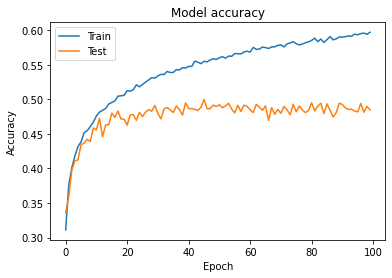

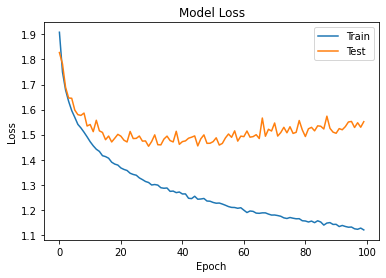

In [ ]:
plot_acc(history)
plt.show()
plot_loss(history)
plt.show()

In [ ]:
Nh_l = [100, 50]
Pd_l = [0.05, 0.5]
number_of_class = 10
Nout = number_of_class

(X_train, Y_train), (X_test, Y_test) = Data_func()
model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

Epoch 1/100
400/400 [==============================] - 2s 3ms/step - loss: 2.1117 - accuracy: 0.2066 - val_loss: 1.9246 - val_accuracy: 0.3045
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 1.9624 - accuracy: 0.2725 - val_loss: 1.8574 - val_accuracy: 0.3286
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 1.9082 - accuracy: 0.3020 - val_loss: 1.8424 - val_accuracy: 0.3241
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8761 - accuracy: 0.3164 - val_loss: 1.8042 - val_accuracy: 0.3445
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8536 - accuracy: 0.3243 - val_loss: 1.7934 - val_accuracy: 0.3513
Epoch 6/100
400/400 [==============================] - 1s 4ms/step - loss: 1.8451 - accuracy: 0.3288 - val_loss: 1.7844 - val_accuracy: 0.3549
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8390 - accuracy: 0.3324 - val_loss: 1.7696 - val_accuracy: 0.3637

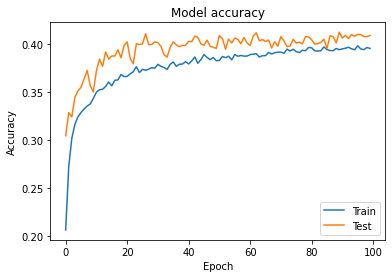

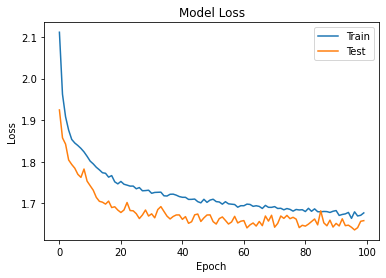

In [ ]:
plot_acc(history)
plt.show()
plot_loss(history)
plt.show()